In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('students_dropout.csv')
df.head(1)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.0,0,10.8,1.4,1.74,Dropout


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [5]:
df.head().T

,0,1,2,3,4
Marital status,1,1,1,1,2
Application mode,17,15,1,17,39
Application order,5,1,5,2,1
Course,171,9254,9070,9773,8014
Daytime/evening attendance\t,1,1,1,1,0
Previous qualification,1,1,1,1,1
Previous qualification (grade),122.0,160.0,122.0,122.0,100.0
Nacionality,1,1,1,1,1
Mother's qualification,19,1,37,38,37
Father's qualification,12,3,37,37,38


In [6]:
df.Target.value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [7]:
df.Nacionality.value_counts().head()

Nacionality
1     4314
41      38
26      14
22      13
6       13
Name: count, dtype: int64

##### This dataset looks like Encoding has already been done because a number of features that should have categorical values already have integer values

In [8]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [9]:
df.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [10]:
#there are no missing values in the dataset

In [11]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Marital status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application mode,4424.0,18.669078,17.484682,1.00,1.00,17.000000,39.000000,57.000000
Application order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.000000,9556.000000,9991.000000
Daytime/evening attendance\t,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous qualification,4424.0,4.577758,10.216592,1.00,1.00,1.000000,1.000000,43.000000
Previous qualification (grade),4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Nacionality,4424.0,1.873192,6.914514,1.00,1.00,1.000000,1.000000,109.000000
Mother's qualification,4424.0,19.561935,15.603186,1.00,2.00,19.000000,37.000000,44.000000
Father's qualification,4424.0,22.275316,15.343108,1.00,3.00,19.000000,37.000000,44.000000


In [13]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4419    False
4420    False
4421    False
4422    False
4423    False
Length: 4424, dtype: bool

In [14]:
df[df.duplicated()]

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target


In [15]:
#there are no duplicate entries in the dataset

<Axes: xlabel='Target'>

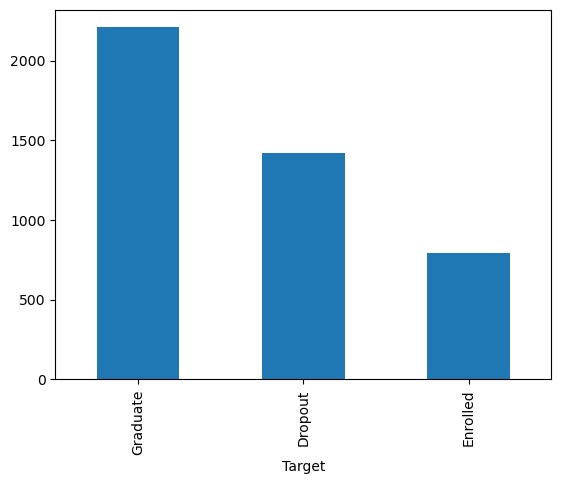

In [16]:
df.Target.value_counts().plot.bar()

In [17]:
import seaborn as sns
sns.set_theme()

<Axes: xlabel='Previous qualification (grade)', ylabel='Course'>

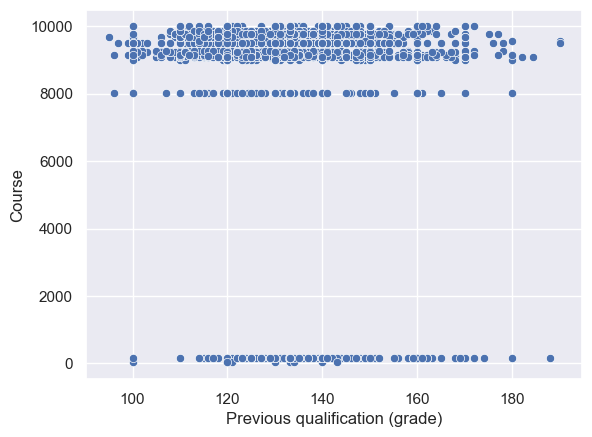

In [18]:
sns.scatterplot(data = df,
                x = 'Previous qualification (grade)',
                y = 'Course')

In [19]:
df1 = df.copy()

In [20]:
df1.drop('Target',
         axis  = 1,
         inplace = True)
df1.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79


In [21]:
df1.corr()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
Marital status,1.000000,0.264006,-0.125854,0.046365,-0.274939,0.062529,-0.022406,-0.008843,0.193163,0.130353,...,0.034711,0.062831,0.039026,0.022784,-0.043739,-0.071506,0.020426,-0.020338,0.008761,-0.027003
Application mode,0.264006,1.000000,-0.286357,0.065385,-0.304092,0.422411,-0.039020,-0.000661,0.118974,0.083276,...,0.045828,0.238445,0.130046,0.167872,-0.071526,-0.115424,0.047983,0.089080,-0.016375,-0.022743
Application order,-0.125854,-0.286357,1.000000,0.059507,0.158657,-0.184315,-0.064484,-0.022416,-0.064956,-0.050288,...,-0.031699,-0.125815,0.028878,-0.055089,0.071793,0.055517,-0.015757,-0.098419,-0.011133,0.030201
Course,0.046365,0.065385,0.059507,1.000000,-0.043151,0.006654,-0.081013,-0.033923,0.054543,0.050724,...,0.034514,-0.089817,0.401539,0.278797,0.198032,0.348728,0.030816,0.007153,0.017710,-0.020265
Daytime/evening attendance\t,-0.274939,-0.304092,0.158657,-0.043151,1.000000,-0.071871,0.052597,0.018530,-0.204767,-0.139894,...,0.045630,-0.111953,0.000371,0.014610,0.034022,0.050493,-0.004229,0.061974,-0.024043,0.022929
Previous qualification,0.062529,0.422411,-0.184315,0.006654,-0.071871,1.000000,0.104072,-0.029214,-0.013190,-0.006614,...,0.002887,0.143031,0.056179,0.114850,-0.008632,0.000942,0.005102,0.111958,-0.063736,0.064069
Previous qualification (grade),-0.022406,-0.039020,-0.064484,-0.081013,0.052597,0.104072,1.000000,0.054088,-0.060670,-0.035234,...,-0.003926,-0.018489,-0.031649,-0.061355,0.050263,0.053239,-0.019015,0.045222,0.018710,-0.052620
Nacionality,-0.008843,-0.000661,-0.022416,-0.033923,0.018530,-0.029214,0.054088,1.000000,-0.049946,-0.085282,...,0.009145,-0.007278,-0.020113,-0.025721,-0.017880,-0.008497,-0.014041,-0.000651,-0.008922,0.034478
Mother's qualification,0.193163,0.118974,-0.064956,0.054543,-0.204767,-0.013190,-0.060670,-0.049946,1.000000,0.535140,...,0.003183,0.042771,0.035150,0.021033,-0.014858,-0.031175,0.021305,-0.114351,0.059441,-0.083657
Father's qualification,0.130353,0.083276,-0.050288,0.050724,-0.139894,-0.006614,-0.035234,-0.085282,0.535140,1.000000,...,-0.017333,0.042666,0.024380,0.009514,0.005285,-0.008083,-0.007430,-0.077905,0.057633,-0.071610


c:\Users\Public\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
c:\Users\Public\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


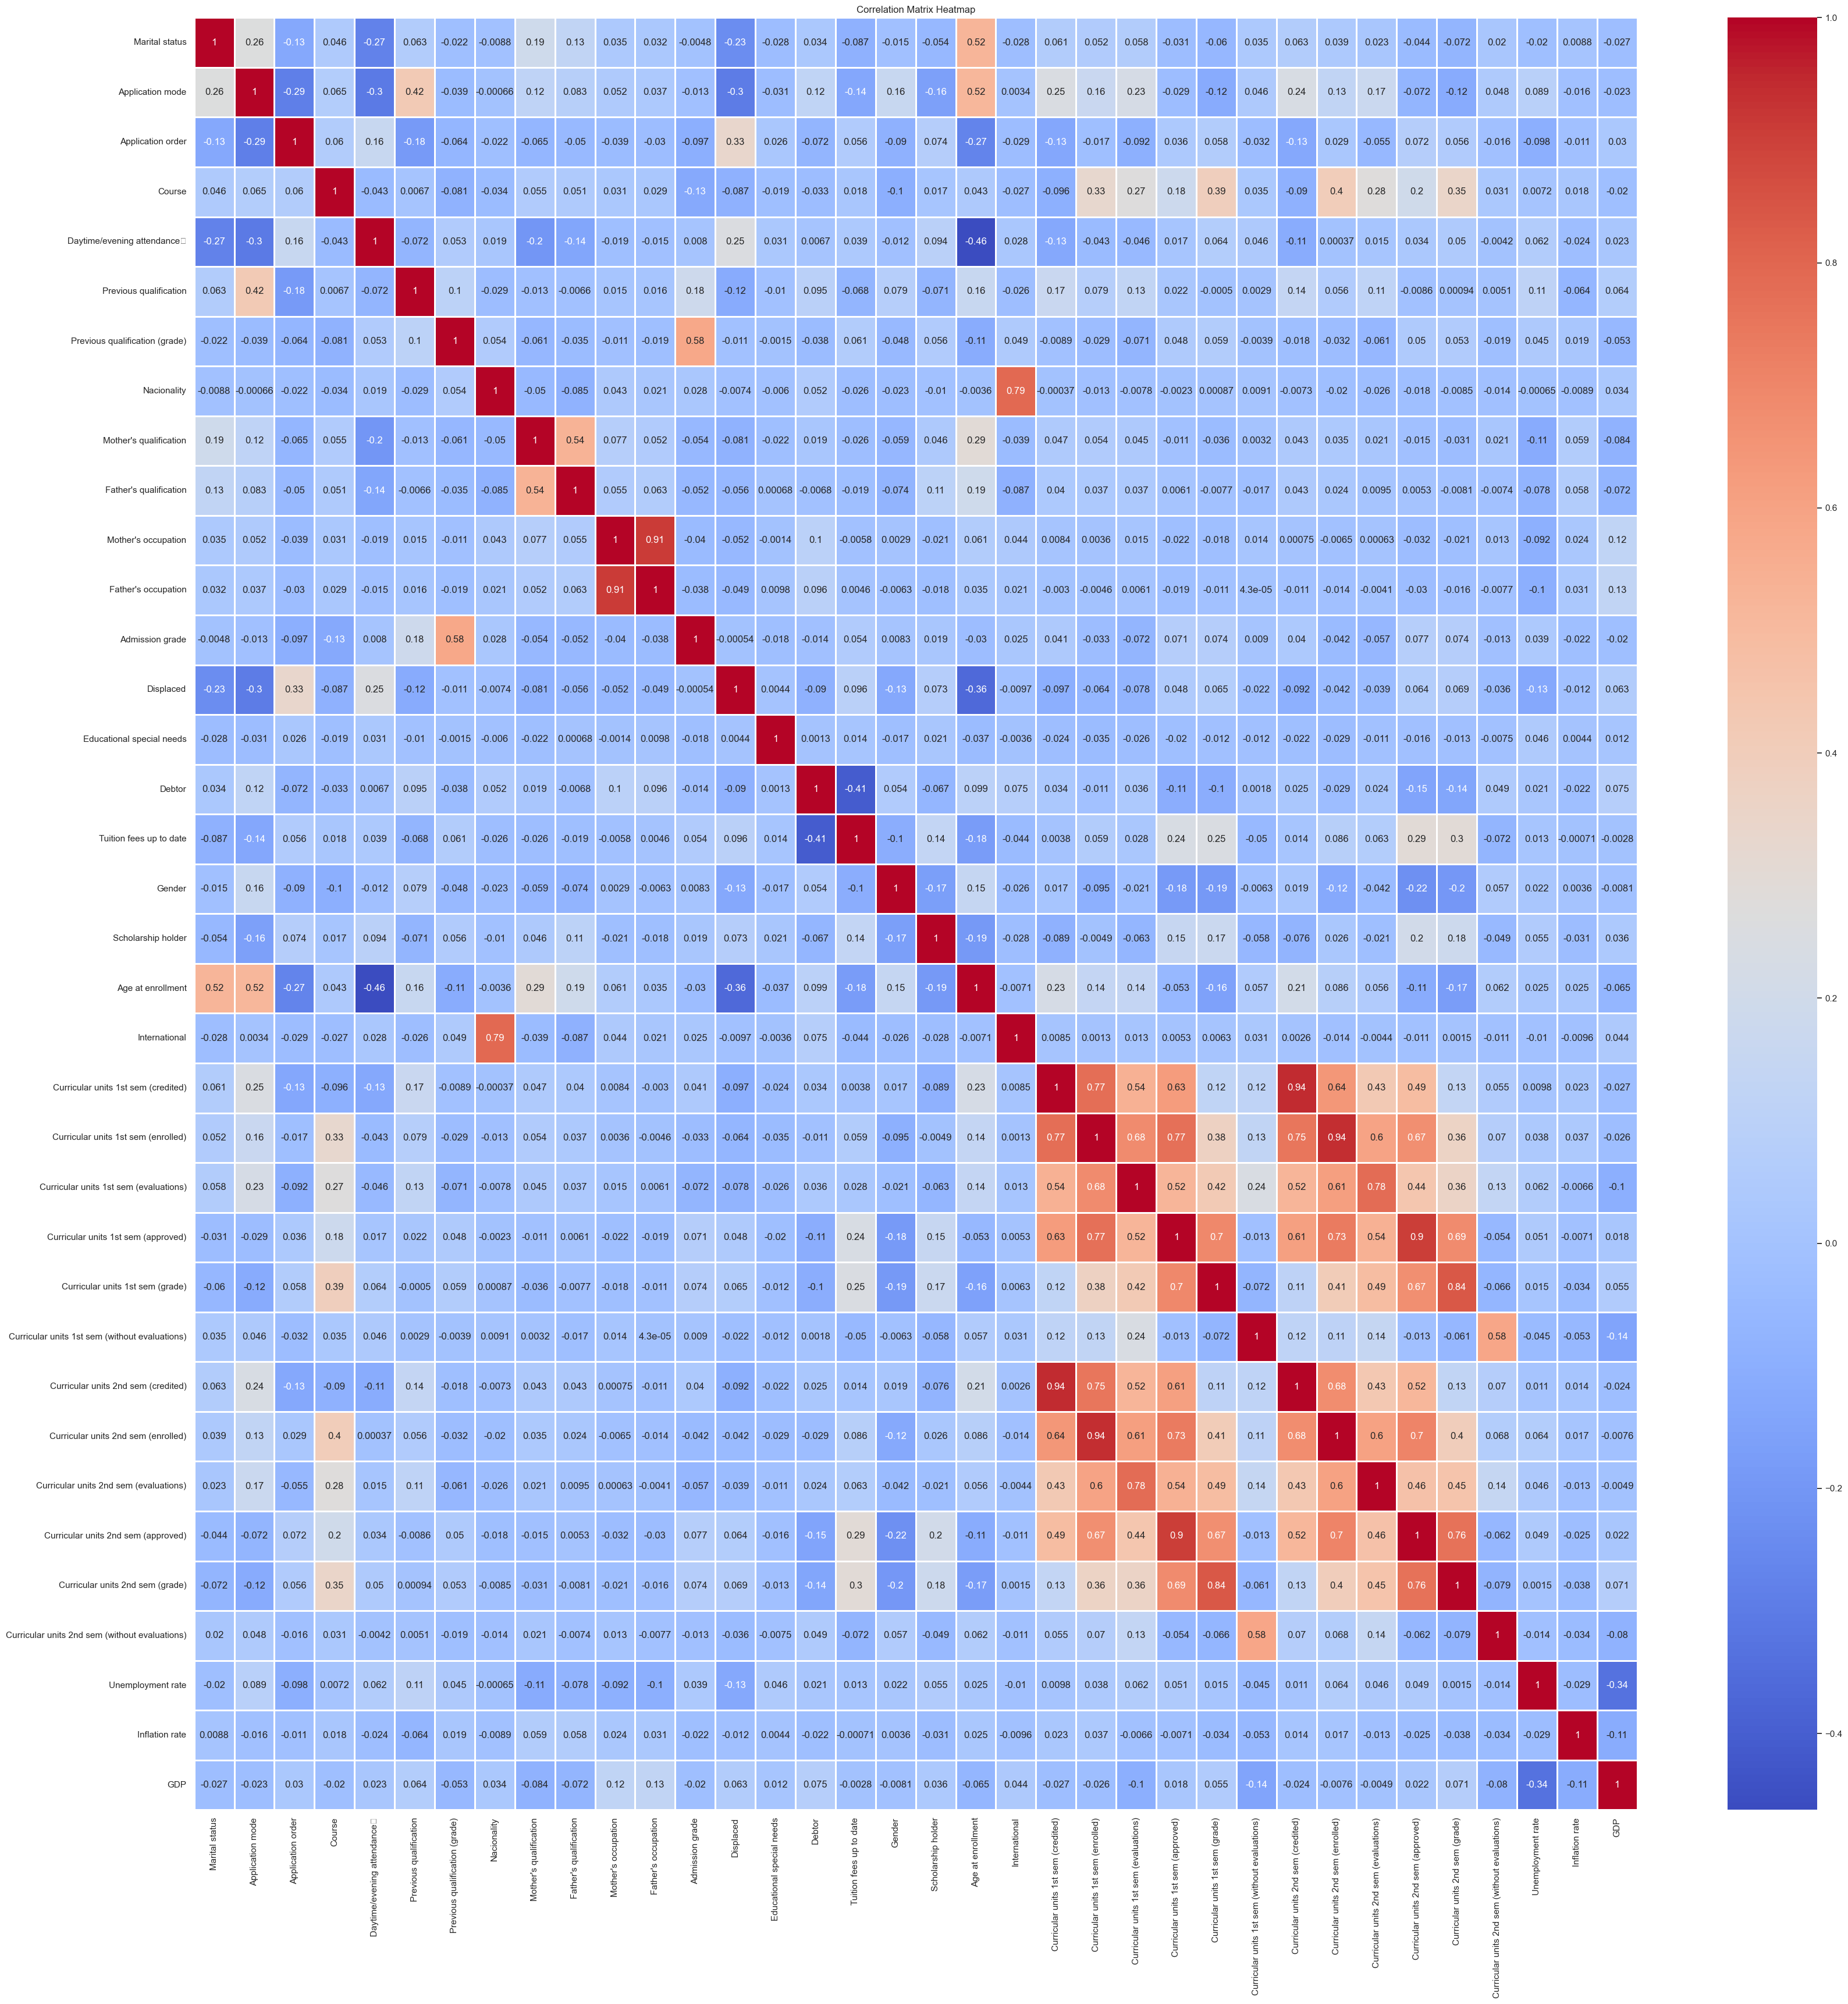

In [22]:
def corr():
    # Calculate the correlation matrix
    corr_matrix = df1.corr()

    # Plot the heatmap
    plt.figure(figsize=(40, 40))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=2)

    plt.title('Correlation Matrix Heatmap')
    plt.show()
corr()

In [23]:
#most of the features in the dataset seem to be fairly positively correlated

In [24]:
df.head().T

,0,1,2,3,4
Marital status,1,1,1,1,2
Application mode,17,15,1,17,39
Application order,5,1,5,2,1
Course,171,9254,9070,9773,8014
Daytime/evening attendance\t,1,1,1,1,0
Previous qualification,1,1,1,1,1
Previous qualification (grade),122.0,160.0,122.0,122.0,100.0
Nacionality,1,1,1,1,1
Mother's qualification,19,1,37,38,37
Father's qualification,12,3,37,37,38


In [25]:
#due to the lack of explainability of the dataset and because there is little subject matter knowledge provided for me in this project, i will not handle outliers

In [26]:
df.Target.value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [27]:
dropout_rate = (1421+794)/(2209+1421+794)

print(f"Dropout rate = {dropout_rate}")

graduate_rate = (2209)/(2209+1421+794)

print(f"Graduate rate = {graduate_rate}")

Dropout rate = 0.5006781193490054
Graduate rate = 0.4993218806509946


* The dropout and graduate rate is almost the same.
* Half of the students do not graduate

##### I am going to convert the target values to integers
* The Dropout and Enrolled values will be turned to 0. It means the student dropped out and the Graduate value will be turned to 1, which means the student graduated from the institution.

In [28]:
df.Target.replace({
    'Graduate':1,
    'Enrolled':0,
    'Dropout':0
}, inplace = True)

In [29]:
df.head(1).T

,0
Marital status,1.00
Application mode,17.00
Application order,5.00
Course,171.00
Daytime/evening attendance\t,1.00
Previous qualification,1.00
Previous qualification (grade),122.00
Nacionality,1.00
Mother's qualification,19.00
Father's qualification,12.00


In [30]:
#I am going to create new features from existing features
#these new features are going to be created by performing different mathematical operations

df['total_grade_1st_sem'] = (df['Curricular units 1st sem (approved)'] + df['Curricular units 1st sem (credited)']+df['Curricular units 1st sem (enrolled)']+df['Curricular units 1st sem (evaluations)']+df['Curricular units 1st sem (grade)']+df['Curricular units 1st sem (without evaluations)'])/6

df['total_grade_2nd_sem'] = (df['Curricular units 2nd sem (approved)'] + df['Curricular units 2nd sem (credited)']+df['Curricular units 2nd sem (enrolled)']+df['Curricular units 2nd sem (evaluations)']+df['Curricular units 2nd sem (grade)']+df['Curricular units 2nd sem (without evaluations)'])/6




In [32]:
df.head(1)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,total_grade_1st_sem,total_grade_2nd_sem
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0.0,0,10.8,1.4,1.74,0,0.0,0.0


In [33]:
df['admission_grade_per_age'] = df['Admission grade']/df['Age at enrollment']

##### Binning continous variables

In [35]:
#binning continuous variables into categorical variables
bins = [0, 20, 40, 60, 80]

labels = ['0-20', '21-40', '41-60', '61-80']

# Bin the data
df['Age_Group'] = pd.cut(df['Age at enrollment'], bins=bins, labels=labels)

df.head(1)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,total_grade_1st_sem,total_grade_2nd_sem,admission_grade_per_age,Age_Group
0,1,17,5,171,1,1,122.0,1,19,12,...,0.0,0,10.8,1.4,1.74,0,0.0,0.0,6.365,0-20


In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Marital status,4424.0,1.178571,0.605747,1.00000,1.000000,1.000000,1.000000,6.000000
Application mode,4424.0,18.669078,17.484682,1.00000,1.000000,17.000000,39.000000,57.000000
Application order,4424.0,1.727848,1.313793,0.00000,1.000000,1.000000,2.000000,9.000000
Course,4424.0,8856.642631,2063.566416,33.00000,9085.000000,9238.000000,9556.000000,9991.000000
Daytime/evening attendance\t,4424.0,0.890823,0.311897,0.00000,1.000000,1.000000,1.000000,1.000000
Previous qualification,4424.0,4.577758,10.216592,1.00000,1.000000,1.000000,1.000000,43.000000
Previous qualification (grade),4424.0,132.613314,13.188332,95.00000,125.000000,133.100000,140.000000,190.000000
Nacionality,4424.0,1.873192,6.914514,1.00000,1.000000,1.000000,1.000000,109.000000
Mother's qualification,4424.0,19.561935,15.603186,1.00000,2.000000,19.000000,37.000000,44.000000
Father's qualification,4424.0,22.275316,15.343108,1.00000,3.000000,19.000000,37.000000,44.000000


##### Adding a log feature
* The log of the course feature is taken

In [37]:
#taking the log of Course column, because it is skewed

df['log_course'] = np.log(df.Course)

In [38]:
df.head(1)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,total_grade_1st_sem,total_grade_2nd_sem,admission_grade_per_age,Age_Group,log_course
0,1,17,5,171,1,1,122.0,1,19,12,...,0,10.8,1.4,1.74,0,0.0,0.0,6.365,0-20,5.141664


In [39]:
df.drop(['Age_Group','Course'],
        axis =1,
        inplace=True)

#### Recursive feature extraction

In [42]:
#recursive feature extraction
from sklearn.feature_selection import RFE
rfe_model = RandomForestClassifier()
rfe = RFE(rfe_model, n_features_to_select=10)
rfe.fit(X=x,y=y)

RFE(estimator=RandomForestClassifier(), n_features_to_select=10)

In [43]:
print("Num Features: ", rfe.n_features_)
print("Selected Features: ", x.columns[rfe.support_])
print("Feature Ranking: ", rfe.ranking_)

Num Features:  10
Selected Features:  Index(['Previous qualification (grade)', 'Admission grade',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)', 'total_grade_1st_sem',
       'total_grade_2nd_sem', 'admission_grade_per_age', 'log_course'],
      dtype='object')
Feature Ranking:  [26 13 17 27 23  1 28 15 12  8  5  1 21 30 19  4 18 11  7 29 20 16  2  1
  1 22 24 10  3  1  1 25  9 14  6  1  1  1  1]


#### Stability Selection

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import resample

# Set parameters for stability selection
n_iterations = 50  # Number of subsamples
threshold = 0.8  # Minimum percentage of subsamples in which a feature must be selected
selected_features_count = []

# Run stability selection
for i in range(n_iterations):
    # Generate a subsample of the data (without replacement)
    X_sub, _, y_sub, _ = train_test_split(x, y, train_size=0.8, random_state=i)
    
    # Fit model on the subsample
    selector = SelectFromModel(LogisticRegression(penalty='l1', solver='liblinear', random_state=i), threshold='mean')
    selector.fit(X_sub, y_sub)
    
    # Record which features were selected
    selected_features_count.append(selector.get_support())

# Sum up the number of times each feature was selected
selected_features_count = np.array(selected_features_count)
feature_selection_frequency = np.mean(selected_features_count, axis=0)

# Select features that were chosen in more than the threshold percentage of iterations
robust_features = x.columns[feature_selection_frequency >= threshold]

# Print the selected robust features
print(f"Selected Robust Features: {list(robust_features)}")


Selected Robust Features: ['Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International', 'Curricular units 1st sem (approved)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (approved)']


In [47]:
df.to_csv('new_data.csv',index=False)

In [41]:
###split the dataset into train and test sets

y = df.Target
x = df.drop('Target',
            axis = 1)

In [31]:
x.head(1)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0,0.0,0,10.8,1.4,1.74


##### Scaling the data
* The dataset has values far off from each other, i want to scale it

In [32]:

scaler = StandardScaler()
x_scaled = scaler.fit(x)
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled, columns = x.columns)
x_scaled.head()


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,-0.294829,-0.095470,2.490896,-4.209520,0.350082,-0.35023,-0.804841,-0.126298,-0.036018,-0.669778,...,-0.199273,-0.282442,-2.838337,-2.042630,-1.471527,-1.963489,-0.199441,-0.287638,0.124386,0.765761
1,-0.294829,-0.209869,-0.554068,0.192580,0.350082,-0.35023,2.076819,-0.126298,-1.189759,-1.256427,...,-0.199273,-0.282442,-0.105726,-0.522682,0.518904,0.659562,-0.199441,0.876222,-1.105222,0.347199
2,-0.294829,-1.010660,2.490896,0.103404,0.350082,-0.35023,-0.804841,-0.126298,1.117723,0.959802,...,-0.199273,-0.282442,-0.105726,-2.042630,-1.471527,-1.963489,-0.199441,-0.287638,0.124386,0.765761
3,-0.294829,-0.095470,0.207173,0.444115,0.350082,-0.35023,-0.804841,-0.126298,1.181819,0.959802,...,-0.199273,-0.282442,-0.105726,0.490616,0.187165,0.416450,-0.199441,-0.813253,-1.466871,-1.375511
4,1.356212,1.162916,-0.554068,-0.408389,-2.856470,-0.35023,-2.473171,-0.126298,1.117723,1.024985,...,-0.199273,-0.282442,-0.105726,-0.522682,0.518904,0.531608,-0.199441,0.876222,-1.105222,0.347199


In [33]:
##scaling allows the values to be in closer range 
x_scaled.head(1)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,-0.294829,-0.09547,2.490896,-4.20952,0.350082,-0.35023,-0.804841,-0.126298,-0.036018,-0.669778,...,-0.199273,-0.282442,-2.838337,-2.04263,-1.471527,-1.963489,-0.199441,-0.287638,0.124386,0.765761


In [34]:
import pickle
pickle.dump(scaler,open('scal.pkl','wb'))

In [35]:
#split the dataset into train and test sets

x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size= 0.2, random_state=42)


In [36]:
x_train.shape,x_test.shape,y_test.shape,y_train.shape

((3539, 36), (885, 36), (885,), (3539,))

In [37]:
from xgboost import XGBClassifier
#from catboost import CatboostClassifier
models  = {'RandomForestClassifier': RandomForestClassifier(),
           'DecisionTreeClassifier': DecisionTreeClassifier(),
           'XGBClassifier':XGBClassifier()
           }

def fit_and_score(models,x_train,x_test,y_train,y_test):
    np.random.seed(42)
    model_scores = {}
    for name,model in models.items():
        model.fit(x_train,y_train)
        model_scores[name]= model.score(x_test,y_test)
    return model_scores

In [38]:
model_scores = fit_and_score(models = models,
                            x_train = x_train,
                            x_test = x_test,
                            y_train = y_train,
                            y_test = y_test)

model_scores

{'RandomForestClassifier': 0.8372881355932204,
 'DecisionTreeClassifier': 0.7898305084745763,
 'XGBClassifier': 0.8395480225988701}

In [39]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)
rf_model.score(x_test,y_test)

0.8372881355932204

In [40]:
## the model accuracy is 0.83, i am going to perform hyperparameter tuning to improve it

In [43]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report

model = RandomForestClassifier(random_state=42)

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [50, 100,150, 200, 250, 300],
    'max_depth': [None, 10, 20, 30,40,50,60],
    'min_samples_split': [2, 5, 10,15],
    'min_samples_leaf': [1, 2, 4,5,6],
    'bootstrap': [True, False]
}


# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search
grid_search.fit(x_train, y_train)

# Print the best parameters and score
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_}')


# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
print(classification_report(y_test, y_pred))




Fitting 2 folds for each of 1680 candidates, totalling 3360 fits
Best parameters: {'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best score: 0.8544779360805843
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       467
           1       0.80      0.86      0.83       418

    accuracy                           0.83       885
   macro avg       0.83      0.83      0.83       885
weighted avg       0.84      0.83      0.83       885



In [58]:
#np.random.seed(42)
model = RandomForestClassifier(n_estimators=350,
                               bootstrap=False,
                               max_depth=30,
                               min_samples_leaf=1,
                               min_samples_split=2)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8395480225988701

In [59]:
y_pred = model.predict(x_test)



In [60]:
confusion_matrix(y_test,y_pred)

array([[383,  84],
       [ 58, 360]], dtype=int64)

In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84       467
           1       0.81      0.86      0.84       418

    accuracy                           0.84       885
   macro avg       0.84      0.84      0.84       885
weighted avg       0.84      0.84      0.84       885



##### Feature importance to know the most important features in the model

In [70]:
feat_imp = model.feature_importances_
feat_imp = feat_imp.reshape(1,-1)

In [71]:
feat_imp.shape

(1, 36)

In [72]:
#feat_imp = model.feature_importances_
importance = pd.DataFrame(feat_imp,columns=x.columns)
importance

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,0.002837,0.016701,0.014501,0.02925,0.002496,0.004105,0.032492,0.002154,0.016675,0.017559,...,0.004157,0.004575,0.022957,0.037651,0.192729,0.100443,0.003263,0.018347,0.017485,0.018942


<Axes: >

c:\Users\Public\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
c:\Users\Public\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


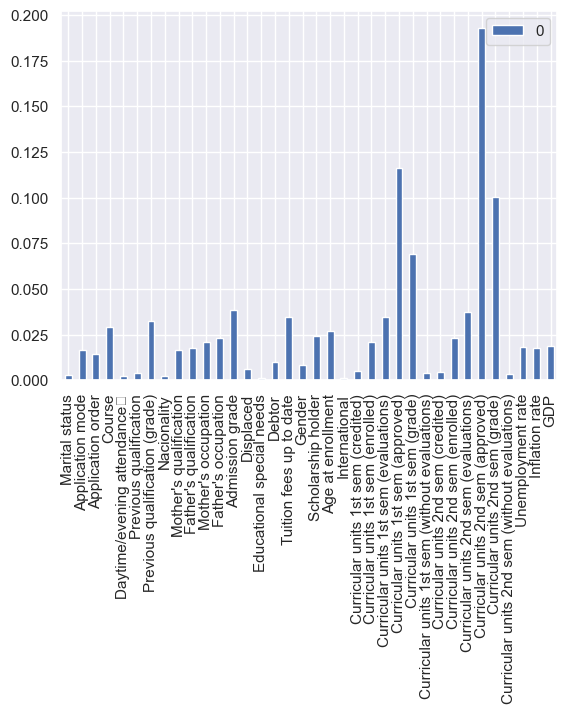

In [75]:
importance.T.plot.bar()

In [76]:
##i am going to select the most important features and retrain the model with them

In [77]:
#the features are
#1 previous qualification(grade)
#2 admission grade
#3 tuition fees up to date
#4 curricular units 1st sem(evaluations)
#5 curricuar units 1st sem (approved)
#6 curricular units 1st sem (grade)
#7 curricular units 2nd sem(evaluations)
#8 curricuar units 2nd sem (approved)
#9 curricular units 2nd sem (grade)
#10 course

In [80]:
df.head(1).T

,0
Marital status,1.00
Application mode,17.00
Application order,5.00
Course,171.00
Daytime/evening attendance\t,1.00
Previous qualification,1.00
Previous qualification (grade),122.00
Nacionality,1.00
Mother's qualification,19.00
Father's qualification,12.00


In [81]:
importance.T

,0
Marital status,0.002837
Application mode,0.016701
Application order,0.014501
Course,0.029250
Daytime/evening attendance\t,0.002496
Previous qualification,0.004105
Previous qualification (grade),0.032492
Nacionality,0.002154
Mother's qualification,0.016675
Father's qualification,0.017559


In [82]:
imp_cols = ['Previous qualification (grade)',
            'Course',
            'Tuition fees up to date',
            'Curricular units 1st sem (evaluations)',
            'Curricular units 1st sem (grade)',
            'Curricular units 1st sem (approved)',
            'Curricular units 2nd sem (evaluations)',
            'Curricular units 2nd sem (grade)',
            'Curricular units 2nd sem (approved)',
            'Admission grade',
            'Target']



In [85]:
for c in df.columns:
    if c not in imp_cols:
        df.drop(c,
                axis = 1,
                inplace = True)
        

In [87]:
df.head(1)

,Course,Previous qualification (grade),Admission grade,Tuition fees up to date,Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Target
0,171,122.0,127.3,1,0,0,0.0,0,0,0.0,0


In [88]:
#split into x and y

y = df.Target
x = df.drop('Target',
            axis = 1)


In [90]:
new_scaler = StandardScaler()
x_scaled = new_scaler.fit(x)
x_scaled = new_scaler.fit_transform(x)

x_scaled = pd.DataFrame(x_scaled, columns=x.columns)
x_scaled.head(1)

,Course,Previous qualification (grade),Admission grade,Tuition fees up to date,Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade)
0,-4.20952,-0.804841,0.022229,0.368135,-1.986068,-1.521257,-2.197102,-2.04263,-1.471527,-1.963489


In [91]:
pickle.dump(new_scaler,open('scal2.pkl','wb'))

In [92]:
#spilt into train and test

x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [93]:
new_model = RandomForestClassifier()
new_model.fit(x_train,y_train)
new_model.score(x_test,y_test)

0.8259887005649718

In [94]:
y_pred = new_model.predict(x_test)

In [95]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83       467
           1       0.79      0.86      0.82       418

    accuracy                           0.83       885
   macro avg       0.83      0.83      0.83       885
weighted avg       0.83      0.83      0.83       885



In [96]:
confusion_matrix(y_test,y_pred)

array([[372,  95],
       [ 59, 359]], dtype=int64)

In [97]:
pickle.dump(new_model,open('model.pkl','wb'))

In [100]:
df.head(1)

,Course,Previous qualification (grade),Admission grade,Tuition fees up to date,Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Target
0,171,122.0,127.3,1,0,0,0.0,0,0,0.0,0


In [112]:
df['Curricular units 2nd sem (grade)'].describe()

count    4424.000000
mean       10.230206
std         5.210808
min         0.000000
25%        10.750000
50%        12.200000
75%        13.333333
max        18.571429
Name: Curricular units 2nd sem (grade), dtype: float64